# WEEK7：神经形态数据集处理

## 7.1 自动下载和手动下载

In [1]:
from spikingjelly.datasets.cifar10_dvs import CIFAR10DVS
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture

print('CIFAR10-DVS downloadable', CIFAR10DVS.downloadable())
print('resource, url, md5/n', CIFAR10DVS.resource_url_md5())

print('DVS128Gesture downloadable', DVS128Gesture.downloadable())
print('resource, url, md5/n', DVS128Gesture.resource_url_md5())

CIFAR10-DVS downloadable True
resource, url, md5/n [('airplane.zip', 'https://ndownloader.figshare.com/files/7712788', '0afd5c4bf9ae06af762a77b180354fdd'), ('automobile.zip', 'https://ndownloader.figshare.com/files/7712791', '8438dfeba3bc970c94962d995b1b9bdd'), ('bird.zip', 'https://ndownloader.figshare.com/files/7712794', 'a9c207c91c55b9dc2002dc21c684d785'), ('cat.zip', 'https://ndownloader.figshare.com/files/7712812', '52c63c677c2b15fa5146a8daf4d56687'), ('deer.zip', 'https://ndownloader.figshare.com/files/7712815', 'b6bf21f6c04d21ba4e23fc3e36c8a4a3'), ('dog.zip', 'https://ndownloader.figshare.com/files/7712818', 'f379ebdf6703d16e0a690782e62639c3'), ('frog.zip', 'https://ndownloader.figshare.com/files/7712842', 'cad6ed91214b1c7388a5f6ee56d08803'), ('horse.zip', 'https://ndownloader.figshare.com/files/7712851', 'e7cbbf77bec584ffbf913f00e682782a'), ('ship.zip', 'https://ndownloader.figshare.com/files/7712836', '41c7bd7d6b251be82557c6cce9a7d5c9'), ('truck.zip', 'https://ndownloader.figs

CIFAR10-DVS等数据集支持自动下载。支持自动下载的数据集，在首次运行时原始数据集将会被下载到数据集根目录下的 `download` 文件夹。每个数据集的 `downloadable()` 函数定义了该数据集是否能够自动下载，而 `resource_url_md5()` 函数定义了各个文件的下载链接和MD5。示例：

DVS128 Gesture数据集不支持自动下载，手动下载好，放在`D:/datasets/DVS128Gesture/download`目录下

## 7.2 获取Event数据

创建训练集和测试集，其中参数 `data_type='event'`表示我们使用Event数据。

运行这段代码，惊蜇框架将会完成以下工作：

- 检测数据集是否存在，如果存在，则进行MD5校验，确认数据集无误后，开始进行解压。将原始数据解压到同级目录下的 `extract` 文件夹

- DVS128 Gesture中的每个样本，是在不同光照环境下，对不同表演者进行录制的手势视频。一个AER文件中包含了多个手势，对应的会有一个csv文件来标注整个视频内各个时间段内都是哪种手势。因此，单个的视频文件并不是一个类别，而是多个类别的集合。惊蜇框架会启动多线程进行划分，将每个视频中的每个手势类别文件单独提取出来

In [3]:
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture

root_dir = 'D:/datasets/DVS128Gesture'
train_set = DVS128Gesture(root_dir, train=True, data_type='event')

The [D:/datasets/DVS128Gesture\download] directory for saving downloaded files already exists, check files...
Mkdir [D:/datasets/DVS128Gesture\extract].
Extract [D:/datasets/DVS128Gesture\download\DvsGesture.tar.gz] to [D:/datasets/DVS128Gesture\extract].
Mkdir [D:/datasets/DVS128Gesture\events_np].
Start to convert the origin data from [D:/datasets/DVS128Gesture\extract] to [D:/datasets/DVS128Gesture\events_np] in np.ndarray format.
Mkdir [('D:/datasets/DVS128Gesture\\events_np\\train', 'D:/datasets/DVS128Gesture\\events_np\\test').
Mkdir ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'] in [D:/datasets/DVS128Gesture\events_np\train] and ['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'] in [D:/datasets/DVS128Gesture\events_np\test].
Start the ThreadPoolExecutor with max workers = [4].
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user01_fluorescent_led.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\train\0\user01_fluorescent_led_0.npz] saved.
[D:/

[D:/datasets/DVS128Gesture\events_np\train\6\user02_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user02_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user01_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user02_led_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user01_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user02_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user02_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user02_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user01_natural_0.npz] saved.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user02_lab.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\train\1\user02_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\2\user02_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\3\user02_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user02_lab

[D:/datasets/DVS128Gesture\events_np\train\6\user04_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\3\user03_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user04_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user03_led_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user03_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user04_led_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user03_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user04_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user03_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user04_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\5\user03_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user04_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user03_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\user03_natural_0.npz] saved.
[D

[D:/datasets/DVS128Gesture\events_np\train\4\user06_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user05_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\user05_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user05_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\5\user06_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user05_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\user06_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user05_natural_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user05_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user06_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user05_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user06_fluorescent_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user05_natural_0.npz] saved.
[D:/datasets/DVS128Gestu

[D:/datasets/DVS128Gesture\events_np\train\3\user07_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user07_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user08_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user08_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user07_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\5\user07_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\user07_lab_0.npz] saved.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user08_fluorescent_led.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\train\7\user07_lab_0.npz] saved.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user08_led.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\train\0\user08_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\0\user08_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user07_lab_1.npz] saved.
[D:/da

[D:/datasets/DVS128Gesture\events_np\train\0\user09_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\user09_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\1\user09_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\2\user09_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user10_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user09_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user09_lab_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user10_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\3\user09_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user09_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user10_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user09_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user09_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10

[D:/datasets/DVS128Gesture\events_np\train\10\user11_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user11_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user11_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user11_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user11_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user11_fluorescent_0.npz] saved.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user13_fluorescent_led.aedat] to samples.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user12_led.aedat] to samples.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user13_fluorescent.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\train\0\user13_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\0\user13_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\0\user12_led_0.npz] saved.
[D

[D:/datasets/DVS128Gesture\events_np\train\7\user14_fluorescent_led_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user14_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user14_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user14_fluorescent_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user14_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user14_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user14_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user14_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\5\user14_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\user14_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user14_fluorescent_0.npz] saved.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user14_natural.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\train\7\user14_l

Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user16_lab.aedat] to samples.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user16_led.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\train\0\user16_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\0\user16_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\1\user16_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\1\user16_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\2\user16_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\2\user16_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\3\user16_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user16_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\3\user16_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\5\user16_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user16_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\use

[D:/datasets/DVS128Gesture\events_np\train\8\user17_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user17_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user17_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user17_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user17_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user17_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user17_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user17_led_0.npz] saved.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user18_fluorescent_led.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\train\0\user18_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\1\user18_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\2\user18_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\3\user18_fluorescent_led_0.npz] s

[D:/datasets/DVS128Gesture\events_np\train\5\user20_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\user20_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user19_led_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user19_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user19_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user20_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user20_fluorescent_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user19_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\8\user20_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user20_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\9\user19_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\7\user19_natural_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\10\user20_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gestu

[D:/datasets/DVS128Gesture\events_np\train\1\user22_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\3\user22_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\2\user22_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\3\user22_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user22_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\3\user22_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user22_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\5\user22_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\4\user22_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\5\user22_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\user22_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\5\user22_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\train\6\user22_fluorescent_led_0.npz] saved.
[D:/datase

[D:/datasets/DVS128Gesture\events_np\train\10\user23_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\1\user24_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\2\user24_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\3\user24_fluorescent_led_0.npz] saved.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user24_fluorescent.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\test\0\user24_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\4\user24_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\1\user24_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\2\user24_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\5\user24_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\3\user24_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\6\user24_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np

[D:/datasets/DVS128Gesture\events_np\test\6\user26_led_0.npz] saved.[D:/datasets/DVS128Gesture\events_np\test\4\user26_natural_0.npz] saved.

[D:/datasets/DVS128Gesture\events_np\test\7\user26_led_0.npz] saved.
Start to split [D:/datasets/DVS128Gesture\extract\DvsGesture\user26_lab.aedat] to samples.
[D:/datasets/DVS128Gesture\events_np\test\4\user27_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\5\user26_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\7\user26_led_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\0\user26_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\6\user26_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\8\user26_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\5\user27_fluorescent_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\7\user26_natural_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\1\user26_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\9\user2

[D:/datasets/DVS128Gesture\events_np\test\2\user28_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\10\user28_fluorescent_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\3\user28_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\6\user28_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\4\user28_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\7\user28_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\7\user28_lab_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\5\user28_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\8\user28_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\6\user28_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\9\user28_lab_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\7\user28_led_0.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\7\user28_led_1.npz] saved.
[D:/datasets/DVS128Gesture\events_np\test\8\user28_led_0.npz] saved.
[D:/datasets/DVS128Ge

打印一个数据：

In [4]:
event, label = train_set[0]
for k in event.keys():
    print(k, event[k])
print('label', label)

t [80048267 80048277 80048278 ... 85092406 85092538 85092700]
x [49 55 55 ... 60 85 45]
y [82 92 92 ... 96 86 90]
p [1 0 0 ... 1 0 0]
label 0


其中 `event` 使用字典格式存储Events数据，键为 `['t', 'x', 'y', 'p']`；`label` 是数据的标签，DVS128 Gesture共有11类。

## 7.3 获取Frame数据

将原始的Event流积分成Frame数据，是常用的处理方法，将原始的Event数据记为$E(x_i,y_i,t_i,p_i),0\le i<N$；设置 `split_by='number'` 表示从Event数量$N$上进行划分，接近均匀地划分为 `frames_num=20`， 也就是$T$段。记积分后的Frame数据中的某一帧为$F(j)$，在$(p,x,y)$位置的像素值为$F(j,p,x,y)$；$F(j)$是从Event流中索引介于$j_l$和$j_r$的Event 积分而来：

![](image/2022-08-05-12-02-08.png)

运行下列代码，惊蜇框架就会开始进行积分，创建Frame数据集：

In [5]:
train_set = DVS128Gesture(root_dir, train=True, data_type='frame', frames_number=20, split_by='number')

Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\1].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\10].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\2].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\4].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\5].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\7].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\8].
Mkdir [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\9].
Mkdir [D:/datasets/DVS128Gesture\

Start to integrate [D:/datasets/DVS128Gesture\events_np\test\1\user29_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\1].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\1\user29_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\1].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\10\user24_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\10\user24_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\10\user24_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\10\user25_fluorescent_0.npz] to frames and save t

Start to integrate [D:/datasets/DVS128Gesture\events_np\test\8\user29_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\8\user29_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user24_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user24_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user24_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user25_fluorescent_0.npz] to frames and save to [D:/d

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\5\user22_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5].Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0\user27_fluorescent_0.npz] saved.
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\5\user23_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\5\user23_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\5\user23_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\5\user23_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5].


Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user01_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user01_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user01_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user01_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user01_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user02_fluorescent_0.npz] to frames and sa

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0\user28_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0\user29_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0\user28_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0\user29_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0\user28_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0\user29_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0\user29_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\1\user24_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\0\user29_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\1\user25_

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3\user25_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3\user24_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3\user26_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3\user26_fluorescent_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3\user25_led_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3\user24_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3\user24_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3\user27_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\3\user26_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_2

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6\user24_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6\user27_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6\user27_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6\user27_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6\user27_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6\user26_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6\user28_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6\user28_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\6\user29_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_numb

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\8\user27_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\8\user28_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\8\user28_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\8\user29_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\9\user24_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\8\user29_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\9\user24_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\9\user24_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\9\user25_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\test\9


Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\0\user10_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\0\user13_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\0\user12_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\0\user14_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\0\user15_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\0\user15_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\0\user14_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\0\user15_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\0\user15_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\trai

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\1\user09_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\1\user10_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\1\user08_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\1\user09_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\1\user10_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\1\user09_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\1\user11_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\1\user12_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\1\user09_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_numb

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\10\user06_lab_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\10\user05_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\10\user05_led_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\10\user06_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\10\user06_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\10\user02_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\10\user06_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\10\user05_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\10\user07_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\trai

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user01_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user02_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user04_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user02_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user04_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user04_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user01_fluorescent_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user01_lab_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user02_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user19_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user17_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user20_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user19_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user20_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user22_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user20_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user22_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\2\user21_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\3\user15_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\3\user15_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\3\user15_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\3\user18_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\3\user18_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\3\user16_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\3\user18_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\3\user17_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\3\user17_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\4\user10_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\4\user10_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\4\user09_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\4\user13_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\4\user12_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\4\user11_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\4\user11_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\4\user09_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\4\user13_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\t

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5\user07_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5\user06_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5\user06_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5\user08_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5\user08_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5\user01_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5\user06_lab_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5\user07_fluorescent_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\5\user06_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\fr

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user04_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user02_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user04_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user05_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user01_natural_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user04_fluorescent_led_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user04_natural_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user05_fluorescent_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user03_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_s

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user20_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user19_natural_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user20_fluorescent_led_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user21_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user21_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user21_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user22_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user23_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\6\user21_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user08_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user06_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user07_fluorescent_led_1.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user08_fluorescent_led_1.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user09_fluorescent_1.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user08_fluorescent_1.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user09_fluorescent_led_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user08_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user08_led_1.npz] saved.

Frames [D:/datasets/DVS1

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user16_natural_1.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user18_fluorescent_led_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user17_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user17_led_1.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user18_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user18_fluorescent_led_1.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user17_natural_1.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user18_fluorescent_1.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\7\user18_led_1.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_s

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\8\user06_fluorescent_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\8\user05_lab_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\8\user08_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\8\user06_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\8\user05_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\8\user01_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\8\user08_lab_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\8\user05_natural_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\8\user08_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user03_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user03_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user02_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user04_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user01_lab_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user04_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user01_led_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user03_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user05_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_num

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user19_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user21_fluorescent_led_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user21_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user22_natural_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user23_fluorescent_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user21_natural_0.npz] saved.Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user23_fluorescent_led_0.npz] saved.

Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user23_lab_0.npz] saved.
Frames [D:/datasets/DVS128Gesture\frames_number_20_split_by_number\train\9\user23_led_0.npz] saved.
Used time = [66.38s].


运行后，同级目录下会出现 `frames_number_20_split_by_number` 文件夹，这里存放了积分生成的Frame数据。

打印一个数据：

In [6]:
frame, label = train_set[0]
print(frame.shape)

(20, 2, 128, 128)


查看1个积分好的Frame数据：

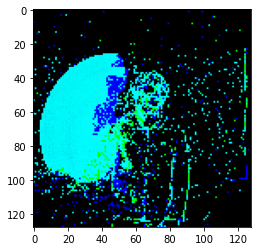

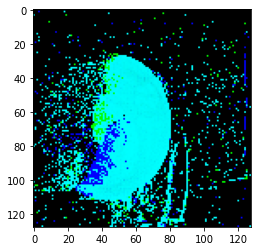

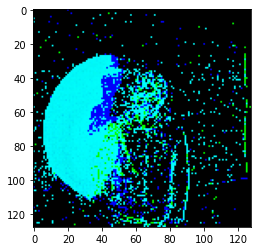

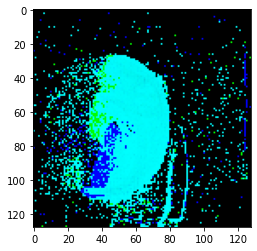

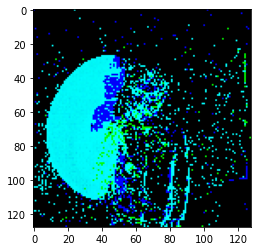

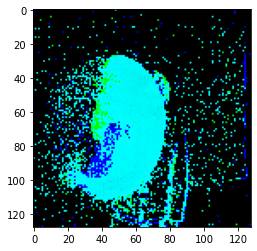

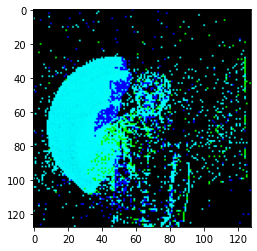

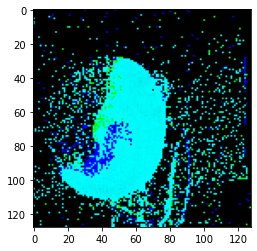

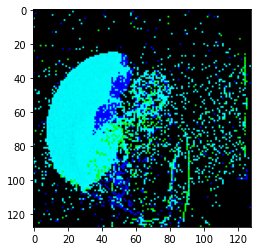

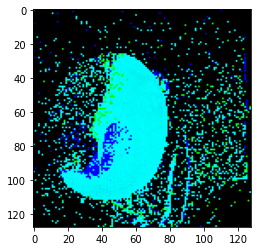

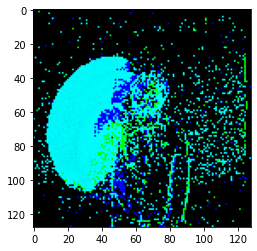

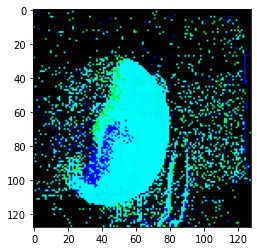

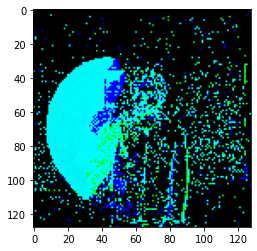

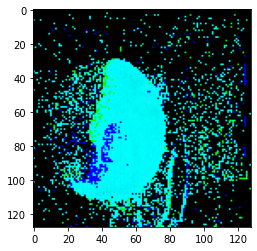

KeyboardInterrupt: 

In [8]:
from spikingjelly.datasets import play_frame
frame, label = train_set[500]
play_frame(frame)

## 7.4 固定时间间隔积分

使用固定时间间隔积分，更符合实际物理系统。例如每 `10 ms` 积分一次，则长度为 `L ms` 的数据，可以得到 `math.floor(L / 10)` 帧。但 神经形态数据集中每个样本的长度往往不相同，因此会得到不同长度的帧数据。使用惊蜇框架提供的 `spikingjelly.datasets.pad_sequence_collate` 和 `spikingjelly.datasets.padded_sequence_mask` 可以很方便的对不等长数据进行对齐和还原。

In [9]:
import torch
from torch.utils.data import DataLoader
from spikingjelly.datasets import pad_sequence_collate, padded_sequence_mask, dvs128_gesture
root='D:/datasets/DVS128Gesture'
train_set = dvs128_gesture.DVS128Gesture(root, data_type='frame', duration=1000000, train=True)
for i in range(5):
    x, y = train_set[i]
    print(f'x[{i}].shape=[T, C, H, W]={x.shape}')
train_data_loader = DataLoader(train_set, collate_fn=pad_sequence_collate, batch_size=5)
for x, y, x_len in train_data_loader:
    print(f'x.shape=[N, T, C, H, W]={tuple(x.shape)}')
    print(f'x_len={x_len}')
    mask = padded_sequence_mask(x_len)  # mask.shape = [T, N]
    print(f'mask=\n{mask.t().int()}')
    break

Mkdir [D:/datasets/DVS128Gesture\duration_1000000].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\0].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\1].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\10].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\2].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\3].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\4].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\5].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\6].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\7].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\8].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\test\9].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\train].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\train\0].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\train\1].
Mkdir [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Mk

Start to integrate [D:/datasets/DVS128Gesture\events_np\test\3\user24_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\3\user24_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\3\user24_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\3\user25_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\3\user25_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\3\user26_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\3].
Start to integrate [D:/datas

Start to integrate [D:/datasets/DVS128Gesture\events_np\test\5\user29_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\5].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\5\user29_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\5].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\5\user29_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\5].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\5\user29_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\5].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\6\user24_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\6].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\6\user24_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\6].
Start to integrate [D:/datas

Frames [D:/datasets/DVS128Gesture\duration_1000000\test\0\user26_natural_0_6.npz] saved.
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user26_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user27_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user27_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user27_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user27_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\test\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\test\9\user28_fluorescent_0.npz] to frames and 

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\0\user14_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\0].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\0\user14_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\0].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\0\user14_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\0].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\0\user15_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\0].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\0\user15_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\0].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\0\user15_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\0].
Start to integra


Start to integrate [D:/datasets/DVS128Gesture\events_np\train\1\user08_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\1].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\1\user08_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\1].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\1\user08_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\1].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\1\user09_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\1].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\1\user09_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\1].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\1\user09_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\1].
Start to integrate 

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user01_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user01_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user01_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user01_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user01_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user02_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user18_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user18_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\0\user29_fluorescent_led_0_5.npz] saved.
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user18_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user19_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user19_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\10].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\10\user19

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user09_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user09_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user09_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user10_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user10_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user10_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datas

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user21_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user22_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user22_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\1\user24_fluorescent_0_6.npz] saved.
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user22_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user22_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\2].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\2\user22_natural_0.npz] to fram

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\3\user18_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\3\user18_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\3\user18_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\3\user19_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\3\user19_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\3].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\3\user19_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\3].
Start to integrate [

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user06_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user06_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user06_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user07_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user07_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user07_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datas

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user22_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user22_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user23_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user23_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user23_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\4\user23_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\4].
Start to integrate [D:/datas

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\6\user01_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\6].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\6\user01_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\6].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\6\user01_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\6].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\6\user01_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\6].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\6\user01_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\6].Frames [D:/datasets/DVS128Gesture\duration_1000000\test\1\user26_natural_0_11.npz] saved.
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\6\user02_fluorescent_0.npz] to fram

Frames [D:/datasets/DVS128Gesture\duration_1000000\test\1\user29_led_0_6.npz] saved.
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user01_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user01_fluorescent_1.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user01_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user01_fluorescent_led_1.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user01_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user01_lab_1.npz] to 

Frames [D:/datasets/DVS128Gesture\duration_1000000\test\1\user28_lab_0_8.npz] saved.Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user15_led_1.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user15_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user15_natural_1.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user16_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user16_fluorescent_1.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\7].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\7\user16_lab_0.npz] to frames and save t

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user01_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user01_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user01_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user01_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user01_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user02_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user19_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user20_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user20_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user20_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user21_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\8\user21_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\8].
Start to

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user09_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user09_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user09_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user09_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user10_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user10_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integra

Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user22_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user22_natural_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user23_fluorescent_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user23_fluorescent_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user23_lab_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Start to integrate [D:/datasets/DVS128Gesture\events_np\train\9\user23_led_0.npz] to frames and save to [D:/datasets/DVS128Gesture\duration_1000000\train\9].
Frames [D:/datasets/DVS128Ge

Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user27_fluorescent_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user27_fluorescent_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user27_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user28_fluorescent_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user28_fluorescent_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user28_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user28_natural_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user29_fluorescent_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user26_lab_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user29_fluorescent_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\4\user28_lab_0_9.npz] saved.
F

Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user27_led_1_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user28_fluorescent_led_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user28_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user28_natural_1_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user28_natural_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user28_lab_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user27_natural_1_12.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user29_fluorescent_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user28_led_1_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user29_fluorescent_1_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\test\7\user28_lab_1_8.npz] saved.
Frames [D:/datasets/DVS1

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user06_natural_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user07_lab_0_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user06_led_0_5.npz] saved.Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user08_led_0_6.npz] saved.

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user08_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user08_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user08_lab_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user09_fluorescent_led_0_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user10_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user09_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\0\user11_fluorescent_led_0_4.np

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user06_fluorescent_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user06_natural_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user06_lab_0_7.npz] saved.Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user05_fluorescent_led_0_9.npz] saved.

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user06_fluorescent_led_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user06_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user07_fluorescent_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user07_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user07_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user07_lab_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\1\user08_lab_0_6.npz] saved

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user04_natural_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user05_natural_0_4.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user05_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user07_fluorescent_led_0_3.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user05_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user02_natural_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user05_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user05_lab_0_7.npz] saved.Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user06_fluorescent_led_0_8.npz] saved.

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user06_lab_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\10\user07_led_0_3

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user02_natural_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user04_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user03_natural_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user04_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user04_fluorescent_0_7.npz] saved.Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user03_fluorescent_0_7.npz] saved.

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user05_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user04_natural_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user05_led_0_7.npz] saved.Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user05_natural_0_6.npz] saved.

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\2\user06_fluorescent_0_7.npz] s

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user02_fluorescent_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user01_natural_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user03_fluorescent_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user01_fluorescent_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user02_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user01_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user04_fluorescent_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user04_fluorescent_0_10.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user02_lab_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user01_fluorescent_led_0_12.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user03_fluoresc

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user22_fluorescent_0_12.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user23_fluorescent_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user22_lab_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user23_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user23_fluorescent_0_10.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\3\user23_lab_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user01_fluorescent_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user01_fluorescent_0_8.npz] saved.Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user01_lab_0_7.npz] saved.

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user01_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user02_fluorescent_led_0_6.npz]

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user19_natural_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user22_fluorescent_0_6.npz] saved.Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user21_fluorescent_led_0_9.npz] saved.

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user22_led_0_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user22_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user21_fluorescent_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user22_natural_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user22_lab_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user23_fluorescent_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user23_fluorescent_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\4\user21_natura

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user20_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user16_lab_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user19_led_0_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user19_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user20_fluorescent_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user19_lab_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user19_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user20_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user19_natural_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user21_fluorescent_led_0_10.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\5\user22_fluorescent_led_0

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user16_fluorescent_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user18_lab_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user19_fluorescent_led_0_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user17_natural_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user16_led_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user17_fluorescent_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user17_lab_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user17_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user19_lab_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user16_lab_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\6\user19_led_0_5.npz] saved.
Frames [D:/dataset

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user07_led_1_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user08_fluorescent_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user07_lab_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user08_fluorescent_led_1_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user08_fluorescent_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user08_fluorescent_1_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user08_led_1_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user09_fluorescent_1_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user09_fluorescent_led_1_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user08_led_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user07_lab_1_7.npz] s

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user20_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user19_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user19_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user19_lab_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user19_fluorescent_led_1_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user20_led_1_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user19_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user20_fluorescent_1_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user20_led_0_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user20_fluorescent_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\7\user19_natural_0_6.np

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user13_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user13_natural_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user10_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user10_fluorescent_0_9.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user13_lab_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user14_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user14_led_0_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user14_natural_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user10_fluorescent_led_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user14_fluorescent_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\8\user15_fluorescent_0_7.npz] saved

Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user11_fluorescent_0_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user08_lab_0_8.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user13_fluorescent_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user12_fluorescent_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user11_fluorescent_led_0_5.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user12_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user10_lab_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user13_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user10_fluorescent_led_0_6.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user13_led_0_7.npz] saved.
Frames [D:/datasets/DVS128Gesture\duration_1000000\train\9\user13_natural_0_